### Analysis of relationship between Ra and VBS - Part 2

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split

In [102]:
down_milling = pd.read_csv('../data/train_down_Y.csv')
#down_milling.drop(index=[48, 49, 51, 72, 91], axis=0, inplace=True)  # drop outliers

In [103]:
vbs = down_milling.vbs
Ra_down = down_milling.Ra_down

In [104]:
b = Ra_down/vbs
b.describe()

count    100.000000
mean       0.004561
std        0.003368
min        0.000914
25%        0.002023
50%        0.003802
75%        0.006233
max        0.017516
dtype: float64

In [105]:
idx_lst = []
vals_lst = []
for idx, vals in enumerate(b):
    if vals > 0.01:
        idx_lst.append(idx)
        vals_lst.append(vals)

In [106]:
idx_lst2 = [48, 49, 51, 72, 91]
vals_lst2 = [Ra_down[48]/vbs[48], Ra_down[49]/vbs[49], Ra_down[51]/vbs[51], Ra_down[72]/vbs[72], Ra_down[91]/vbs[91]]

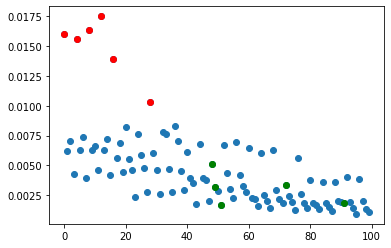

In [107]:
plt.plot(b, 'o')
plt.plot(idx_lst2, vals_lst2, 'go')
plt.plot(idx_lst, vals_lst, 'ro')

In [108]:
down_milling.drop(index=[48, 49, 51, 72, 91], axis=0, inplace=True)  # drop outliers
vbs = down_milling.vbs
Ra_down = down_milling.Ra_down

In [109]:
df_reg = load('../modeling/df_reg.joblib') 

In [110]:
vbs_min = min(vbs)
vbs_max = max(vbs)

In [111]:
Ra_pred = []
vbs_vec = np.linspace(vbs_min, vbs_max, 100)
for i in vbs_vec:
    Ra_pred.append(df_reg.predict(i.reshape(-1, 1))[0])

In [119]:
vbs_train, vbs_test , Ra_train, Ra_test= train_test_split(vbs, Ra_down,test_size=0.2, random_state=20, shuffle=True)

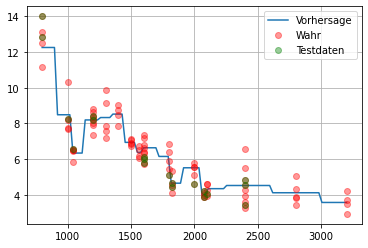

In [126]:
plt.plot(vbs_vec, Ra_pred, label='Vorhersage')
plt.plot(vbs, Ra_down, 'ro', alpha=0.4, label='Wahr')
plt.plot(vbs_test, Ra_test, 'go', alpha=0.4, label='Testdaten')
plt.legend()
plt.grid()